In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Basic 

In [89]:
list_D=np.round(np.arange(0.4, 2.6, 0.1), decimals=1)

In [90]:
data={}
mag={}
for D in list(list_D):
    tmp=pd.read_csv('../diag_D_rho0/avg_prof_D/D%s/f_avg_prof.dat'%D, sep=' ', names=['t', 'm', 'rho'])
    
    s=tmp.shape[0]
    data[D]=np.reshape(tmp.rho.values[:400*(s//400)], (-1, 400))
    mag[D]=np.sum(np.reshape(tmp.m.values[:400*(s//400)], (-1, 400)), axis=1)
    print(D, data[D].shape[0])

0.4 1000
0.5 1000
0.6 1000
0.7 1000
0.8 1000
0.9 1000
1.0 1000
1.1 1000
1.2 1000
1.3 1000
1.4 1000
1.5 1000
1.6 1000
1.7 1000
1.8 1000
1.9 1000
2.0 1000
2.1 1000
2.2 1000
2.3 1000
2.4 1000
2.5 1000


In [91]:
x1={}
x2={}
dx={}

for D in list_D:
    th=np.max(data[D][-1,:])/2
    print(th)
    
    t0, x0 = np.where((data[D]<=th)&(np.roll(data[D],-5, axis=1)>=th))
    x1[D]=x0[np.unique(t0, return_index=True)[1]]

    t0, x0 = np.where((data[D]>=th)&(np.roll(data[D],-5, axis=1)<th))
    x2[D]=x0[np.unique(t0, return_index=True)[1]]

    dx[D]=[]
    for t in range(data[D].shape[0]):
        if x2[D][t]>x1[D][t]:
            dx[D].append(np.int64(0.5*(x2[D][t]+x1[D][t]-400)))
        else:
            dx[D].append(np.int64(0.5*(x2[D][t]+x1[D][t])))

    dx[D]=np.array(dx[D])
    


1.485
1.255
1.195
1.105
1.085
1.01
1.005
0.98
0.95
0.915
0.91
0.88
0.87
0.81
0.815
0.82
0.815
0.785
0.775
0.79
0.73
0.74


(400, 500)

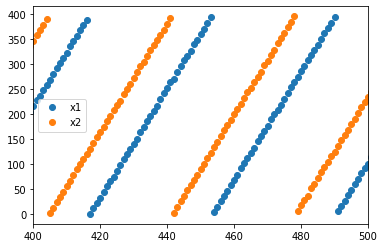

In [92]:
D=0.4
#plt.plot(0.5*(x1[D]+x2[D]-2*dx[D]))
plt.plot(x1[D], 'o', label='x1')
plt.plot(x2[D], 'o', label='x2')
#plt.plot(dx[D])

plt.legend()

plt.xlim(400,500)

In [93]:
avg_prof={}
for D in list_D:
    print(D)
    if D==0.5:
        avg_prof[D]=np.mean([np.roll(data[D][t, :], 
                                 -dx[D][t]) 
                         for t in range(950, 1000) 
                         if x2[D][t]>x1[D][t]+50]
                            , axis=0)
    else: 
        avg_prof[D]=np.mean([np.roll(data[D][t, :], 
                                 -dx[D][t]) 
                         for t in range(200, 600) 
                         if x2[D][t]>x1[D][t]+50]
            , axis=0)

0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5


In [94]:
dx[D].shape

(1000,)

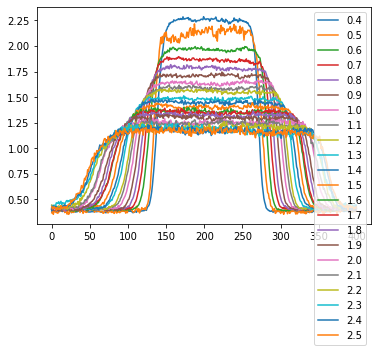

In [95]:
for D in list_D:
    plt.plot(avg_prof[D], label=D)

    
    plt.legend()

In [96]:
rhol0={}
rhog0={}

for D in list_D:
    rhol0[D]=np.mean(avg_prof[D][170:230])
    rhog0[D]=np.mean(np.roll(avg_prof[D], 200)[180:220])
    

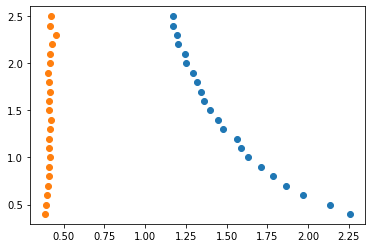

In [97]:
u=list(rhol0)
plt.plot([rhol0[D] for D in u], u, 'o')
plt.plot([rhog0[D] for D in u], u, 'o')

In [38]:
phi={D:np.mean(avg_prof[D]>1) for D in list_D}

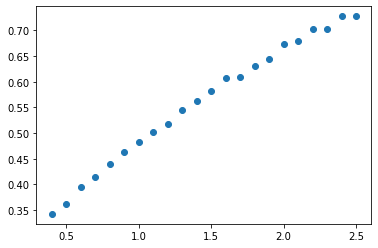

In [42]:
plt.plot(list_D, [phi[D] for D in list_D], 'o')

# $r_0=\frac{1}{\sqrt{\pi}}$

In [179]:
list_D=[0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2]

In [161]:
data_off={}
for D in list_D:
    data_off[D]=pd.read_csv('../diag_D_rho0/avg_prof_D_v1/D%s/f_avg_prof.dat'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(400)])
    data_off[D]=(data_off[D].dropna(axis='rows')).values
    print(D)

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2


FileNotFoundError: [Errno 2] File ../diag_D_rho0/avg_prof_D_v1/D1.4/f_avg_prof.dat does not exist: '../diag_D_rho0/avg_prof_D_v1/D1.4/f_avg_prof.dat'

In [162]:
x1_off={}
x2_off={}
dx_off={}

for D in list_D:
    try:
        th=np.max(data_off[D][-1,:])/2

        t0, x0 = np.where((data_off[D]<=th)&(np.roll(data_off[D],-5, axis=1)>=th))
        x1_off[D]=x0[np.unique(t0, return_index=True)[1]]

        t0, x0 = np.where((data_off[D]>=th)&(np.roll(data_off[D],-5, axis=1)<th))
        x2_off[D]=x0[np.unique(t0, return_index=True)[1]]

        dx_off[D]=[]
        for t in range(data_off[D].shape[0]):
            if x2_off[D][t]>x1_off[D][t]:
                dx_off[D].append(np.int64(0.5*(x2_off[D][t]+x1_off[D][t]-400)))
            else:
                dx_off[D].append(np.int64(0.5*(x2_off[D][t]+x1_off[D][t])))

        dx_off[D]=np.array(dx_off[D])
    

    except: pass

In [163]:
avg_prof_off={}

for D in list_D:
    print(D)
    try: 
        avg_prof_off[D]=np.mean([np.roll(data_off[D][t, :], 
                                 -dx_off[D][t]) 
                         for t in range(0, data_off[D].shape[0]) 
                         #if x2_off[D][t]>x1_off[D][t]+50
                              ]
            , axis=0)

    except: pass

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2
1.4


In [167]:
data_on={}

for D in list(list_D):

    data_on[D]=pd.read_csv('../../AI2D_on_lattice/diag_rhol_D_pupdate/avg_prof_D_v1/D%s/f_bands.dat'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(400)])
    data_on[D]=(data_on[D].dropna(axis='rows')).values

In [169]:
x1_on={}
x2_on={}
dx_on={}

for D in list_D:
    try:
        th=np.max(data_on[D][-1,:])/2

        t0, x0 = np.where((data_on[D]<=th)&(np.roll(data_on[D],-5, axis=1)>=th))
        x1_on[D]=x0[np.unique(t0, return_index=True)[1]]

        t0, x0 = np.where((data_on[D]>=th)&(np.roll(data_on[D],-5, axis=1)<th))
        x2_on[D]=x0[np.unique(t0, return_index=True)[1]]

        dx_on[D]=[]
        for t in range(data_on[D].shape[0]):
            if x2_on[D][t]>x1_on[D][t]:
                dx_on[D].append(np.int64(0.5*(x2_on[D][t]+x1_on[D][t]-400)))
            else:
                dx_on[D].append(np.int64(0.5*(x2_on[D][t]+x1_on[D][t])))

        dx_on[D]=np.array(dx_on[D])
    

    except: print(D)

1.4


In [170]:
avg_prof_on={}

for D in list_D:
    print(D)
    try: 

        avg_prof_on[D]=np.mean([np.roll(data_on[D][t, :], 
                                 -dx_on[D][t]) 
                         for t in range(0, data_on[D].shape[0]) 
                         #if x2_s[D][t]>x1_s[D][t]+50
                              ]
            , axis=0)
    except: pass

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2
1.4


In [171]:
rhol0_off={}
rhog0_off={}

for D in list_D:
    try:
        rhol0_off[D]=np.mean(avg_prof_off[D][170:230])
        rhog0_off[D]=np.mean(np.roll(avg_prof_off[D], 200)[180:220])
    except: pass

In [172]:
rhol0_on={}
rhog0_on={}

for D in list_D:
    rhol0_on[D]=np.mean(avg_prof_on[D][170:230])
    rhog0_on[D]=np.mean(np.roll(avg_prof_on[D], 200)[180:220])
    

KeyError: 1.4

Text(0.5, 1.0, 'On-lattice')

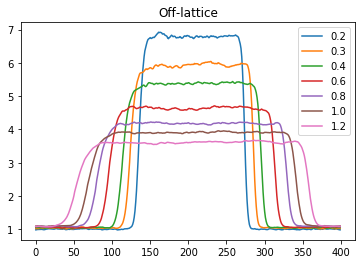

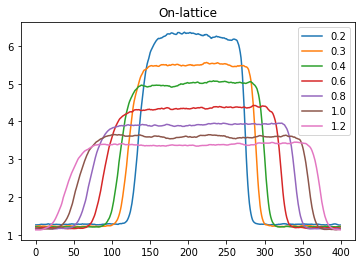

In [182]:
for D in list_D:
    try:
        plt.plot(avg_prof_off[D], label=D)

        plt.legend()
    except: pass
    
plt.title('Off-lattice')

plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_on[D], label=D)

        plt.legend()
    except: pass
    
plt.title('On-lattice')

Text(0, 0.5, '$D$')

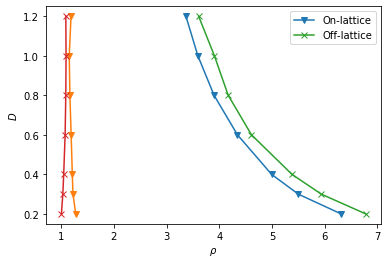

In [185]:
u=list_D
plt.plot([rhol0_on[D] for D in u], u, 'v-', label='On-lattice')
plt.plot([rhog0_on[D] for D in u], u, 'v-')

plt.plot([rhol0_off[D] for D in u], u, 'x-', label='Off-lattice')
plt.plot([rhog0_off[D] for D in u], u, 'x-')



plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

# Rescaled $D$ and $v$

In [2]:
list_D=[0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2]

In [3]:
list_D_off=np.round(np.pi*np.array(list_D), 2)

In [4]:
list_D

[0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2]

In [5]:
data_on={}

for D in list(list_D):

    data_on[D]=pd.read_csv('../../AI2D_on_lattice/diag_rhol_D_pupdate/avg_prof_D_v1/D%s/f_bands.dat.gz'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(400)])
    data_on[D]=(data_on[D].dropna(axis='rows')).values

In [6]:
x1_on={}
x2_on={}
dx_on={}

for D in list_D:
    try:
        th=np.max(data_on[D][-1,:])/2

        t0, x0 = np.where((data_on[D]<=th)&(np.roll(data_on[D],-5, axis=1)>=th))
        x1_on[D]=x0[np.unique(t0, return_index=True)[1]]

        t0, x0 = np.where((data_on[D]>=th)&(np.roll(data_on[D],-5, axis=1)<th))
        x2_on[D]=x0[np.unique(t0, return_index=True)[1]]

        dx_on[D]=[]
        for t in range(data_on[D].shape[0]):
            if x2_on[D][t]>x1_on[D][t]:
                dx_on[D].append(np.int64(0.5*(x2_on[D][t]+x1_on[D][t]-400)))
            else:
                dx_on[D].append(np.int64(0.5*(x2_on[D][t]+x1_on[D][t])))

        dx_on[D]=np.array(dx_on[D])
    

    except: print(D)

In [7]:
avg_prof_on={}

for D in list_D:
    print(D)
    try: 

        avg_prof_on[D]=np.mean([np.roll(data_on[D][t, :], 
                                 -dx_on[D][t]) 
                         for t in range(0, data_on[D].shape[0]) 
                         #if x2_s[D][t]>x1_s[D][t]+50
                              ]
            , axis=0)
    except: pass

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2


In [8]:
data_off={}
for D in list_D_off:
    data_off[D]=pd.read_csv('avg_prof_D_v3/D%s/f_avg_prof.dat.gz'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(708)])
    data_off[D]=(data_off[D].dropna(axis='rows')).values
    print(D)

0.31
0.63
0.94
1.26
1.88
2.51
3.14
3.77


In [9]:
x1_off={}
x2_off={}
dx_off={}

for D in list_D_off:
    try:
        th=np.max(data_off[D][-1,:])/2
        print(th)

        t0, x0 = np.where((data_off[D]<=th)&(np.roll(data_off[D],-5, axis=1)>=th))
        x1_off[D]=x0[np.unique(t0, return_index=True)[1]]

        t0, x0 = np.where((data_off[D]>=th)&(np.roll(data_off[D],-5, axis=1)<th))
        x2_off[D]=x0[np.unique(t0, return_index=True)[1]]

        dx_off[D]=[]
        for t in range(data_off[D].shape[0]):
            if x2_off[D][t]>x1_off[D][t]:
                dx_off[D].append(np.int64(0.5*(x2_off[D][t]+x1_off[D][t]-708)))
            else:
                dx_off[D].append(np.int64(0.5*(x2_off[D][t]+x1_off[D][t])))

        dx_off[D]=np.array(dx_off[D])
    

    except: pass

3.03
1.21
1.09
1.0
0.9
0.805
0.755
0.71


In [10]:
avg_prof_off={}

for D in list_D_off:
    print(D)
    try: 
        avg_prof_off[D]=np.mean([np.roll(data_off[D][t, :], 
                                 -dx_off[D][t]) 
                         for t in range(0, data_off[D].shape[0]) 
                         if x2_off[D][t]>x1_off[D][t]+50
                              ]
            , axis=0)

    except: pass

0.31
0.63
0.94
1.26
1.88
2.51
3.14
3.77


In [11]:
rhol0_off={}
rhog0_off={}

for D in list_D_off:
    try:
        rhol0_off[D]=np.mean(avg_prof_off[D][330:380])
        rhog0_off[D]=np.mean(np.roll(avg_prof_off[D], 354)[330:380])
    except: pass

In [12]:
rhol0_on={}
rhog0_on={}

for D in list_D:
    rhol0_on[D]=np.mean(avg_prof_on[D][170:230])
    rhog0_on[D]=np.mean(np.roll(avg_prof_on[D], 200)[180:220])
    

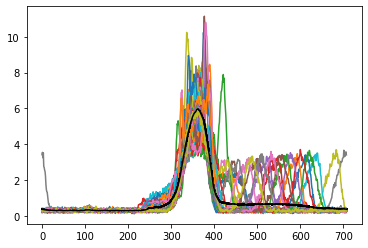

In [13]:
Di=0.31

for t in range(0, data_off[Di].shape[0], 100):
    if x2_off[Di][t]>x1_off[Di][t]+50:
        plt.plot(np.roll(data_off[Di][t, :], -dx_off[Di][t]) )

    plt.plot(avg_prof_off[Di], 'k')

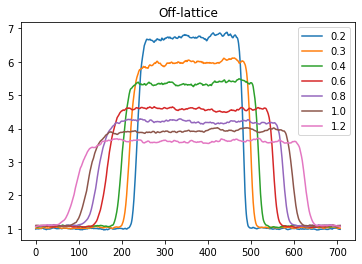

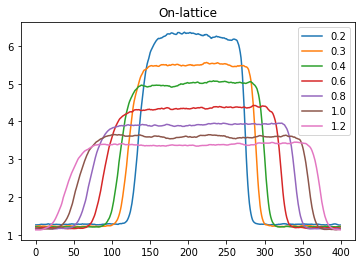

In [14]:
for D in list_D_off[1:]:
    try:
        plt.plot(avg_prof_off[D]*np.pi, label=np.round(D/np.pi, 2))

        plt.legend()
    except: pass
    
plt.title('Off-lattice')

plt.subplots()
for D in list_D[1:]:
    try:
        plt.plot(avg_prof_on[D], label=D)

        plt.legend()
    except: pass
    
plt.title('On-lattice');

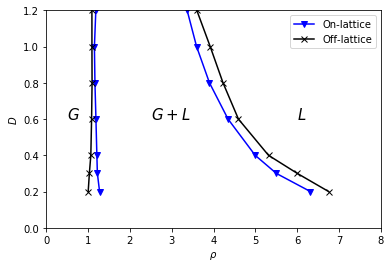

In [15]:
plt.plot([rhol0_on[D] for D in list_D[1:]], list_D[1:], 'bv-', label='On-lattice')
plt.plot([rhog0_on[D] for D in list_D[1:]], list_D[1:], 'bv-')

plt.plot([rhol0_off[D]*np.pi for D in list_D_off[1:]], list_D[1:], 'kx-', label='Off-lattice')
plt.plot([rhog0_off[D]*np.pi for D in list_D_off[1:]], list_D[1:], 'kx-')


plt.xlim(0,8)
plt.ylim(0,1.2)

plt.annotate(r'$G$', xy=(0.5,0.6), fontsize=15)
plt.annotate(r'$G+L$', xy=(2.5,0.6), fontsize=15)
plt.annotate(r'$L$', xy=(6,0.6), fontsize=15)


plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

plt.savefig('rho0_D_pupdate.pdf')